In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits

import numpy as np
import pandas as pd

In [3]:
digits = load_digits(return_X_y=True)
clf = DecisionTreeClassifier()

In [51]:
cvs1 = cross_val_score(clf, digits[0], digits[1], cv=10)
cvs1.mean()

0.83195406451797693

In [52]:
f1 = open('txt1.txt', 'w')
f1.write(str(cvs1.mean()))
f1.close()

In [6]:
from sklearn.ensemble import BaggingClassifier

In [7]:
bc = BaggingClassifier(clf, n_estimators=100)

In [56]:
cvs2 = cross_val_score(bc, digits[0], digits[1], cv=10)
cvs2.mean()

0.92327470076579865

In [58]:
f2 = open('txt2.txt', 'w')
f2.write(str(cvs2.mean()))
f2.close()

In [19]:
digits[0].shape

(1797, 64)

In [25]:
bc_new = BaggingClassifier(clf, n_estimators=100, max_features=8, bootstrap_features=True)

In [63]:
cvs3 = cross_val_score(bc_new, digits[0], digits[1], cv=10)
cvs3.mean()

0.92879305219390285

In [64]:
f2 = open('txt3.txt', 'w')
f2.write(str(cvs3.mean()))
f2.close()

In [27]:
clf_new = DecisionTreeClassifier(max_features=8)
bc1 = BaggingClassifier(clf_new, n_estimators=100, bootstrap_features=True)

In [70]:
cvs4 = cross_val_score(bc1, digits[0], digits[1], cv=10)
cvs4.mean()

0.95776599245811767

In [71]:
f2 = open('txt4.txt', 'w')
f2.write(str(cvs4.mean()))
f2.close()

In [73]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

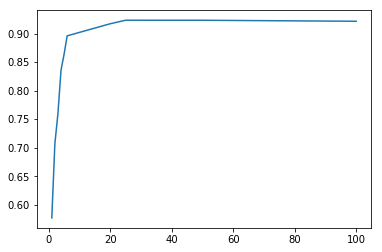

In [79]:
nestim = (1, 2, 3, 4, 5, 6, 20, 25, 50, 100)
y = []
for i in nestim:
    rfc = RandomForestClassifier(max_depth=i)
    y.append(cross_val_score(rfc, digits[0], digits[1], cv=10).mean())
plt.plot(nestim, y)
plt.show()